1. Построить диаграмму (гистограмму) количества хитов для каждой cell/блока/детектора.
2. Далее строить всячески пространственные диаграммы.
3. Аналогично пункту 1, только построить диаграмму количества ложных хитов (шума) для ячейки/блока/детектора.
4. Построить диаграмму количества хитов на частицу. Попытаться построить зависимости количества хитов от заряда/начального положения/начального импульса.

In [1]:
import os
import random

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
particles_df = pd.read_csv('datasets/unarch/train_100_events/event000001000-particles.csv')
hits_df = pd.read_csv('datasets/unarch/train_100_events/event000001000-hits.csv')
cells_df = pd.read_csv('datasets/unarch/train_100_events/event000001000-cells.csv')
truth_df = pd.read_csv('datasets/unarch/train_100_events/event000001000-truth.csv')

In [3]:
print(particles_df.shape)
particles_df.head(4)

(12263, 9)


,particle_id,vx,vy,vz,px,py,pz,q,nhits
0,4503668346847232,-0.009288,0.009861,-0.077879,-0.055269,0.323272,-0.203492,-1,8
1,4503737066323968,-0.009288,0.009861,-0.077879,-0.948125,0.470892,2.010060,1,11
2,4503805785800704,-0.009288,0.009861,-0.077879,-0.886484,0.105749,0.683881,-1,0
3,4503874505277440,-0.009288,0.009861,-0.077879,0.257539,-0.676718,0.991616,1,12


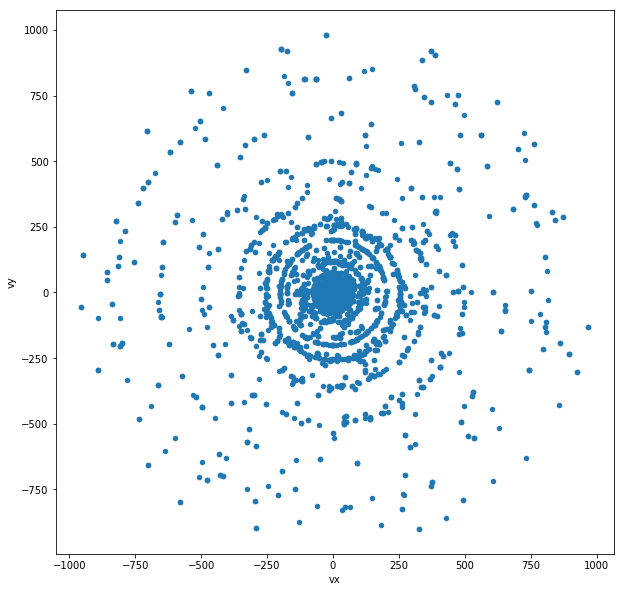

In [4]:
#particles_df.plot(kind='scatter', x='py', y='pz')
particles_df.plot(kind='scatter', x='vx', y='vy', figsize=(10, 10))
#particles_df.plot?

In [5]:
print(hits_df.shape)
hits_df.head(4)

(120939, 7)


,hit_id,x,y,z,volume_id,layer_id,module_id
0,1,-64.4099,-7.163700,-1502.5,7,2,1
1,2,-55.3361,0.635342,-1502.5,7,2,1
2,3,-83.8305,-1.143010,-1502.5,7,2,1
3,4,-96.1091,-8.241030,-1502.5,7,2,1


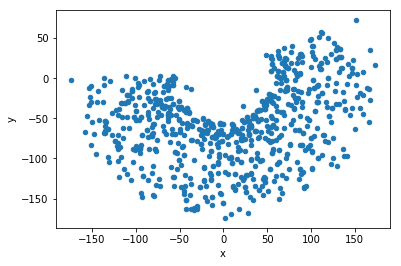

In [6]:
hits_df.head(800).plot(kind='scatter', x='x', y='y')

In [7]:
print(cells_df.shape)
cells_df.head(20)

(664996, 4)


,hit_id,ch0,ch1,value
0,1,209,617,0.013832
1,1,210,617,0.079887
2,1,209,618,0.211723
3,2,68,446,0.334087
4,3,58,954,0.034005
5,3,58,956,0.007798
6,3,60,951,0.019897
7,3,58,955,0.099964
8,3,59,952,0.065576
9,3,60,952,0.018697


In [8]:
print(truth_df.shape)
truth_df.head(10)

(120939, 9)


,hit_id,particle_id,tx,ty,tz,tpx,tpy,tpz,weight
0,1,0,-64.4116,-7.164120,-1502.5,250710.000000,-149908.000000,-956385.00000,0.000000
1,2,22525763437723648,-55.3385,0.630805,-1502.5,-0.570605,0.028390,-15.49220,0.000010
2,3,0,-83.8280,-1.145580,-1502.5,626295.000000,-169767.000000,-760877.00000,0.000000
3,4,297237712845406208,-96.1229,-8.230360,-1502.5,-0.225235,-0.050968,-3.70232,0.000008
4,5,418835796137607168,-62.6594,-9.375040,-1502.5,-0.281806,-0.023487,-6.57318,0.000009
5,6,108087696726949888,-57.0856,-8.189710,-1502.5,-0.401129,-0.035276,-10.46690,0.000008
6,7,968286151951515648,-73.8608,-2.575860,-1502.5,-0.442662,-0.036969,-9.13010,0.000007
7,8,954766419537428480,-63.8512,-10.875400,-1502.5,-0.670459,-0.092609,-15.54070,0.000011
8,9,707072769359085568,-97.2489,-10.906700,-1502.5,-0.279789,-0.062143,-4.41292,0.000008
9,10,67554956483231744,-90.2763,-3.243970,-1502.5,-0.251752,-0.037138,-4.24922,0.000006


Кажется, есть возможность простым поиском соответствующего particle_id в truth_df, восстановить как пространственную траекторию частицы (нашёл строчку с соотвествующим particle_id - взял координаты, нашёл следующую строку с этим же particle_id - взял координаты). Может быть, можно попробовать предсказывать координты следующего хита имея "на руках" координаты текущего, нескольки предыдущих (вплот до точки рождения), заряд, импульс (значения предыдуших импульсов в моменты столкновений - хитов). Ну и можно воостановить не только траекторию "в координатах", но и траекторию в "ячейках" детекторов - hit_id у нас то же в truth_df имеется, а по нему легко воостановить ячейку/блок/детектор. А далее можно взять из таблицы детекторов координаты/матрицу поворота, и например попробовать найти завивисимости чего либо (например количества хитов) от характеристик блока/поворота. Или, ещё лучше - попробовать предсказыать импульс после столкновения, в зависимости от поворота, заряда, импульса в момент столкновения. 

In [9]:
detectors_df = pd.read_csv('datasets/unarch/detectors.csv')

In [10]:
print(detectors_df.shape)
detectors_df.head(4)

(18728, 21)


,volume_id,layer_id,module_id,cx,cy,cz,rot_xu,rot_xv,rot_xw,rot_yu,...,rot_yw,rot_zu,rot_zv,rot_zw,module_t,module_minhu,module_maxhu,module_hv,pitch_u,pitch_v
0,7,2,1,-65.7965,-5.17830,-1502.5,0.078459,-0.996917,0.0,-0.996917,...,0.0,0,0,-1,0.15,8.4,8.4,36,0.05,0.05625
1,7,2,2,-139.8510,-6.46568,-1502.0,0.046183,-0.998933,0.0,-0.998933,...,0.0,0,0,-1,0.15,8.4,8.4,36,0.05,0.05625
2,7,2,3,-138.6570,-19.34190,-1498.0,0.138156,-0.990410,0.0,-0.990410,...,0.0,0,0,-1,0.15,8.4,8.4,36,0.05,0.05625
3,7,2,4,-64.1764,-15.40740,-1498.0,0.233445,-0.972370,0.0,-0.972370,...,0.0,0,0,-1,0.15,8.4,8.4,36,0.05,0.05625


In [11]:
submission_df = pd.read_csv('datasets/unarch/sample_submission.csv')

In [12]:
print(submission_df.shape)
submission_df.head(4)

(13741466, 3)


,event_id,hit_id,track_id
0,0,1,0
1,0,2,0
2,0,3,0
3,0,4,0


In [13]:
train_dataset_dir = 'datasets/unarch/train_100_events'
dataset_filenames = os.listdir(train_dataset_dir)
print(dataset_filenames[:4])
event_ids = []
event_filenames = {}
for filename in dataset_filenames[:20]:
    event_id = filename[5:14]
    #print(event_id)
    if event_id not in event_ids:
        event_ids.append(event_id)
    if event_id not in event_filenames:
        event_filenames[event_id] = [filename]
    else:
        event_filenames[event_id].append(filename)

['event000001015-truth.csv', 'event000001022-cells.csv', 'event000001056-cells.csv', 'event000001043-particles.csv']


In [14]:
def random_sublist_select(original_list, sublist_size):
    return [original_list[i] for i in random.sample(range(len(original_list)), sublist_size)]

In [15]:
def offset_sublist_select(original_list, sublist_size, offset):
    return original_list[offset:offset + sublist_size]

In [16]:
def select_random_indexses_subset(size, subset_size):
    return random.sample(tuple(range(size)), subset_size) 

In [17]:
def select_offset_indexses_subset(size, subset_size, offset):
    return tuple(range(size))[offset:offset + subset_size]

In [18]:
def read_dataset_filenames_from_dir(path_to_datasets_dir):
    dataset_filenames = os.listdir(path_to_datasets_dir)
    event_filenames = {}
    for filename in dataset_filenames:
        path_to_file = os.path.join(path_to_datasets_dir, filename)
        event_id = filename[5:14]
        if event_id not in event_filenames:
            event_filenames[event_id] = [path_to_file]
        else:
            event_filenames[event_id].append(path_to_file)
    return event_filenames

In [19]:
def select_events(indexes_list, event_names):
    return tuple(event_names[i] for i in indexes_list)

In [20]:
def random_events_select(event_names, subset_size):
    event_names_len = len(event_names)
    indexes = select_random_indexses_subset(event_names_len, subset_size)
    return select_events(indexes, event_names)

In [21]:
def offset_events_select(event_names, subset_size, offset):
    event_names_len = len(event_names)
    indexes = select_offset_indexses_subset(event_names_len, subset_size, offset)
    return select_events(indexes, event_names)

In [22]:
def read_dataset_filenames_random(directory_list, sample_size=0):
    event_grouped_dataset_filenames = {}
    for directory in directory_list:
        dataset_filenames = read_dataset_filenames_from_dir(directory)
        event_names = tuple(dataset_filenames)
        if sample_size > 0:
            event_names = random_events_select(event_names, sample_size)
        dataset_filenames = {event_name: sorted(dataset_filenames[event_name]) for event_name in event_names}
        event_grouped_dataset_filenames.update(dataset_filenames)
    return event_grouped_dataset_filenames    

In [23]:
def read_dataset_filenames_offset(directory_list, sample_size=0, offset=0):
    event_grouped_dataset_filenames = {}
    for directory in directory_list:
        dataset_filenames = read_dataset_filenames_from_dir(directory)
        event_names = tuple(dataset_filenames)
        if sample_size > 0:
            event_names = offset_events_select(tuple(dataset_filenames), sample_size, offset)
        dataset_filenames = {event_name: sorted(dataset_filenames[event_name]) for event_name in event_names}
        event_grouped_dataset_filenames.update(dataset_filenames)
    return event_grouped_dataset_filenames 

In [24]:
def random_select_dataset_filenames(dataset_filenames, sample_size):
    return {
        event_name: dataset_filenames[event_name] for event_name in random_events_select(
            tuple(dataset_filenames),
            sample_size
        )
    }

In [25]:
def offset_select_dataset_filenames(dataset_filenames, sample_size, offset):
    return {
        event_name: dataset_filenames[event_name] for event_name in offset_events_select(
            tuple(dataset_filenames),
            sample_size,
            offset
        )
    }

In [26]:
def reduce_df_types(df):
    for column in df.columns:
        if df[column].dtype == np.float64:
            df.loc[:, column] = df[column].astype(np.float32)
        elif df[column].dtype == np.int64:
            df.loc[:, column] = df[column].astype(np.int32)
    return df

In [27]:
event_grouped_dataset_filenames = read_dataset_filenames_random(['datasets/unarch/train_1/'], 10)

In [28]:
#event_grouped_dataset_filenames

In [29]:
#event_grouped_dataset_filenames_1 = read_dataset_filenames_offset(['datasets/unarch/train_1/'], 20)

In [30]:
#event_grouped_dataset_filenames_1

In [31]:
#all_event_grouped_dataset_filenames = read_dataset_filenames_random(['datasets/unarch/train_1/'])

In [32]:
#random_selected_dataset_filenames = random_select_dataset_filenames(all_event_grouped_dataset_filenames, 100)

In [33]:
#print(len(random_selected_dataset_filenames))
#random_selected_dataset_filenames

In [34]:
def create_event_df(event_id, particles_df, truth_df, cells_df, hits_df):
    #return pd.merge(truth_df, hits_df, on='hit_id')
    truth_hits_df = pd.merge(truth_df, hits_df, on='hit_id')
    particles_truth_hits_df = pd.merge(particles_df, truth_hits_df, on='particle_id', how='right')
    #return particles_truth_hits_df
    return pd.merge(cells_df, particles_truth_hits_df, on='hit_id', how='outer')

In [35]:
def read_dataset_to_grouped_by_event_dfs(selected_dataset_filenames):
    event_dfs = {}
    for event_id, event_filenames in selected_dataset_filenames.items():
        event_dfs[event_id] = create_event_df(
            event_id,
            pd.read_csv(event_filenames[2]),
            pd.read_csv(event_filenames[3]),
            pd.read_csv(event_filenames[0]),
            pd.read_csv(event_filenames[1])
        )
    return event_dfs        

In [36]:
def read_dataset_to_grouped_by_event_dfs(selected_dataset_filenames):
    grouped_by_event_dfs = {}
    for event_id, event_filenames in selected_dataset_filenames.items():
        grouped_by_event_dfs[event_id] = (
            pd.read_csv(event_filenames[2]),
            pd.read_csv(event_filenames[3]),
            pd.read_csv(event_filenames[0]),
            pd.read_csv(event_filenames[1])
        )
    return grouped_by_event_dfs 

In [37]:
def read_dataset_to_event_dfs(grouped_by_event_dfs):
    event_dfs = {}
    for event_id, dfs in grouped_by_event_dfs.items():
        event_dfs[event_id] = create_event_df(
            event_id,
            dfs[0],
            dfs[1],
            dfs[2],
            dfs[3]
        )
    return event_dfs 

In [38]:
all(hits_df['hit_id'] == truth_df['hit_id'])

True

In [39]:
#event_df = create_event_df(0, particles_df, truth_df, cells_df, hits_df)

In [40]:
#event_df.shape

In [41]:
grouped_by_event_datasets_df = read_dataset_to_grouped_by_event_dfs(event_grouped_dataset_filenames)

In [42]:
#grouped_by_event_datasets_df.keys()

In [43]:
#grouped_by_event_datasets_df['000002231']

In [44]:
for event_id, dataframes in grouped_by_event_datasets_df.items():
    reduce_df_types(dataframes[0])
    reduce_df_types(dataframes[1])
    reduce_df_types(dataframes[2])
    reduce_df_types(dataframes[3])
    print(dataframes[0].info())
    print(dataframes[1].info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9313 entries, 0 to 9312
Data columns (total 9 columns):
particle_id    9313 non-null int32
vx             9313 non-null float32
vy             9313 non-null float32
vz             9313 non-null float32
px             9313 non-null float32
py             9313 non-null float32
pz             9313 non-null float32
q              9313 non-null int32
nhits          9313 non-null int32
dtypes: float32(6), int32(3)
memory usage: 327.5 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97033 entries, 0 to 97032
Data columns (total 9 columns):
hit_id         97033 non-null int32
particle_id    97033 non-null int32
tx             97033 non-null float32
ty             97033 non-null float32
tz             97033 non-null float32
tpx            97033 non-null float32
tpy            97033 non-null float32
tpz            97033 non-null float32
weight         97033 non-null float32
dtypes: float32(7), int32(2)
memory usage: 3.3 MB
None
<class 'p

In [45]:
#event_dfs = read_dataset_to_event_dfs(grouped_by_event_datasets_df)

In [46]:
#event_dfs['000002771'].info()

In [48]:
#len(event_dfs)

In [49]:
#not_merged_dfs_0 = grouped_by_event_datasets_df['000002771']

In [50]:
#event_cells_0 = not_merged_dfs_1[0]

In [51]:
#event_cells_0.isnull()

In [52]:
def is_null(df):
    columns_dict = {}
    for column_name in df.columns.tolist():
        columns_dict[column_name] = any(df[column_name].isnull())
    return columns_dict

In [53]:
'''
for event_id, grouped_dfs in grouped_by_event_datasets_df.items():
    print(event_id)
    print("particles:", is_null(grouped_dfs[0]))
    print("truth:", is_null(grouped_dfs[1]))
    print("cells:", is_null(grouped_dfs[2]))
    print("hits:", is_null(grouped_dfs[3]))
'''

'\nfor event_id, grouped_dfs in grouped_by_event_datasets_df.items():\n    print(event_id)\n    print("particles:", is_null(grouped_dfs[0]))\n    print("truth:", is_null(grouped_dfs[1]))\n    print("cells:", is_null(grouped_dfs[2]))\n    print("hits:", is_null(grouped_dfs[3]))\n'

In [54]:
'''
for event_id, df in event_dfs.items():
    print(event_id)
    print(is_null(df))
'''

'\nfor event_id, df in event_dfs.items():\n    print(event_id)\n    print(is_null(df))\n'

In [55]:
for event_id, grouped_dfs in grouped_by_event_datasets_df.items():
    print(event_id)
    print("particles:", grouped_dfs[0].info())
    print("truth:", grouped_dfs[1].info())
    print("cells:", grouped_dfs[2].info())
    print("hits:", grouped_dfs[3].info())

000001633
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9313 entries, 0 to 9312
Data columns (total 9 columns):
particle_id    9313 non-null int32
vx             9313 non-null float32
vy             9313 non-null float32
vz             9313 non-null float32
px             9313 non-null float32
py             9313 non-null float32
pz             9313 non-null float32
q              9313 non-null int32
nhits          9313 non-null int32
dtypes: float32(6), int32(3)
memory usage: 327.5 KB
particles: None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97033 entries, 0 to 97032
Data columns (total 9 columns):
hit_id         97033 non-null int32
particle_id    97033 non-null int32
tx             97033 non-null float32
ty             97033 non-null float32
tz             97033 non-null float32
tpx            97033 non-null float32
tpy            97033 non-null float32
tpz            97033 non-null float32
weight         97033 non-null float32
dtypes: float32(7), int32(2)
memory usage: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97108 entries, 0 to 97107
Data columns (total 9 columns):
hit_id         97108 non-null int32
particle_id    97108 non-null int32
tx             97108 non-null float32
ty             97108 non-null float32
tz             97108 non-null float32
tpx            97108 non-null float32
tpy            97108 non-null float32
tpz            97108 non-null float32
weight         97108 non-null float32
dtypes: float32(7), int32(2)
memory usage: 3.3 MB
truth: None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 532351 entries, 0 to 532350
Data columns (total 4 columns):
hit_id    532351 non-null int32
ch0       532351 non-null int32
ch1       532351 non-null int32
value     532351 non-null float32
dtypes: float32(1), int32(3)
memory usage: 8.1 MB
cells: None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97108 entries, 0 to 97107
Data columns (total 7 columns):
hit_id       97108 non-null int32
x            97108 non-null float32
y           

In [56]:
test_hits_df = pd.read_csv('datasets/unarch/test/event000000000-hits.csv')
test_cells_df = pd.read_csv('datasets/unarch/test/event000000000-cells.csv')

In [57]:
test_hits_df

,hit_id,x,y,z,volume_id,layer_id,module_id
0,1,-60.8267,-4.160230,-1502.5,7,2,1
1,2,-84.7294,-7.295280,-1502.5,7,2,1
2,3,-42.5930,5.048750,-1502.5,7,2,1
3,4,-62.4975,2.729920,-1502.5,7,2,1
4,5,-66.2037,-10.601200,-1502.5,7,2,1
5,6,-63.0563,-3.073910,-1502.5,7,2,1
6,7,-100.0770,-9.506260,-1502.5,7,2,1
7,8,-56.6046,-1.169750,-1502.5,7,2,1
8,9,-60.5920,2.177720,-1502.5,7,2,1
9,10,-56.1216,-9.457400,-1502.5,7,2,1


In [58]:
test_cells_df

,hit_id,ch0,ch1,value
0,1,155,550,0.268630
1,2,180,978,0.316736
2,3,0,214,0.241720
3,4,15,570,0.277643
4,5,275,655,0.083079
5,5,275,654,0.209093
6,5,274,654,0.004407
7,6,129,588,0.045867
8,6,130,588,0.243962
9,7,200,1254,0.030831
